<a href="https://colab.research.google.com/github/Rashmi-KA/MachineLearning/blob/master/Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [0]:
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [0]:
books.shape

(271360, 8)

In [0]:
users.shape

(278858, 3)

In [0]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [0]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [0]:
#Dropping last three columns containing image URLs which will not be required for analysis
books = books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis = 1)

In [0]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

In [0]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [0]:
bookspub = books['yearOfPublication']

In [0]:
bookspub.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [0]:
#Drop last three columns containing image URLs which will not be required for analysis
books[books.yearOfPublication == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [0]:
#Drop the rows having 'DK Publishing Inc' and 'Gallimard' as yearOfPublication
books = books[(books.yearOfPublication != 'DK Publishing Inc') & (books.yearOfPublication != 'Gallimard')]

In [0]:
### Change the datatype of yearOfPublication to 'int'
#
books['yearOfPublication'] = books['yearOfPublication'].astype(int)

In [0]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

In [0]:
#drop NaNs in 'publisher' column
books = books.dropna(subset=['publisher'])
books.publisher.isnull().sum()

0

In [0]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [0]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

In [0]:
#Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs
import numpy as np

In [0]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [0]:
### Replace null values in column Age with mean
#
users['Age'] = users['Age'].fillna(users['Age'].mean())

In [0]:
users['Age'] = users['Age'].astype(int)

In [0]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

In [0]:
ratings.shape

(1149780, 3)

In [0]:
n_users = users.shape[0]
n_books = books.shape[0]

In [0]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [0]:
#Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs
ratings_books = ratings[ratings.ISBN.isin(books.ISBN)]

In [0]:
ratings_books.shape

(1031130, 3)

In [0]:
### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows
#
ratings_books_users = ratings_books[ratings.userID.isin(users.userID)]

C:\Users\Fourtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [0]:
ratings_books_users.shape

(1031130, 3)

In [0]:
ratings_books_users['bookRating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [0]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_books_users[ratings_books_users.bookRating != 0]
ratings_implicit = ratings_books_users[ratings_books_users.bookRating == 0]

In [0]:
print(ratings_books_users.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031130, 3)
(383839, 3)
(647291, 3)


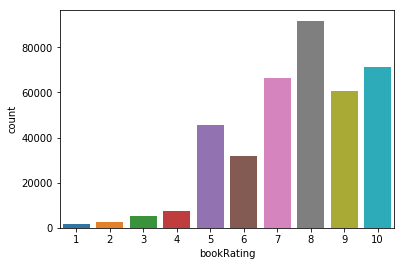

In [0]:
#plotting count of bookRating
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=ratings_explicit , x='bookRating')

In [0]:
#ratings_explicit['bookRating'].plot(kind = 'bar')

### **Collaborative Filtering Based Recommendation Systems**

In [0]:
#counts1 = pd.value_counts(ratings_explicit['userID'])
counts_1 = ratings_explicit.userID.value_counts()

In [0]:
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts_1[counts_1 >= 100].index)]

In [0]:
ratings_explicit.head(2)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8


In [0]:
ratings_explicit

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9
...,...,...,...
1147587,275970,185649814X,7
1147592,275970,1860462588,8
1147599,275970,1886411077,6
1147611,275970,3411086211,10


In [0]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [0]:
ratings_explicit.head(2)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8


In [0]:
data = Dataset.load_from_df(ratings_explicit[['userID', 'ISBN', 'bookRating']], reader)

In [0]:
data.df.head(2)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8


### SVD Based Recommendation System

In [0]:
# Spliting data into training and test set
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=42)

In [0]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x0000015F12FD7570>

In [0]:
testset[0]

(271448, '0375709118', 8.0)

In [0]:
from surprise import SVD
from surprise import accuracy

In [0]:
svd = SVD(n_factors=50,biased=False)
svd.fit(trainset)

In [0]:
test_pred = svd.test(testset)

In [0]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 3.1435


3.1434740940851538

In [0]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 31826][['iid', 'r_ui']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui
1,0875961835,10.0
11128,0451822196,10.0
19914,0679821481,10.0
19909,0671004573,10.0
19320,0425107469,10.0
18526,0671701231,10.0
18331,0316532843,10.0
17449,0671888587,10.0
17015,0439042445,10.0
16523,0590118897,10.0
